# Exploratory Data Analysis on Google Play Store

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data=pd.read_csv("googleplaystore.csv")

### Description of App Dataset columns
* App : The name of the app
* Category : The category of the app
* Rating : The rating of the app in the Play Store
* Reviews : The number of reviews of the app
* Size : The size of the app
* Install : The number of installs of the app
* Type : The type of the app (Free/Paid)
* Price : The price of the app (0 if it is Free)
* Content Rating :The appropiate target audience of the app
* Genres: The genre of the app
* Last Updated : The date when the app was last updated
* Current Ver : The current version of the app
* Android Ver : The minimum Android version required to run the app

## Basic Checks 

In [3]:
# First five rows
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Last five rows
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Shape of data
data.shape

(10841, 13)

In [6]:
# Columns in data
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [8]:
# Statistical data for categorical values
data.describe(include="O")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [9]:
# Examine data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# showing no. of unique values in the columns of the dataset
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

### Unique Values in the columns of the Dataset

In [11]:
# showing unique entries in the 'Category' column
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
# showing unique entries in the 'Type' column
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [13]:
# showing unique entries in the 'Content Rating' column
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [14]:
# showing unique entries in the 'Rating' column
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [15]:
# showing unique entries in the 'Genre' column
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

## Data Preprocessing

In [16]:
# Checking duplicated values in the columns of the dataset
data.duplicated().sum()

483

In [17]:
# Dropping Duplicate values from the Dataset
data.drop_duplicates(inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


* After dropping duplicate values the no of rows decrease from 10841 to 10358.

In [18]:
# showing the information of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By Looking at the dataFrame, we know that:

* There are 13 columns of properties with 10841 rows of data.
* Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'
* Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
* Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
* Values of column 'Price' are strings representing price with symbol '$'.

Hence, we will need to do some data cleaning.

In [19]:
# Checking data types
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Data Cleaning

In [20]:
# Check on null values and sorting into ascending order.
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

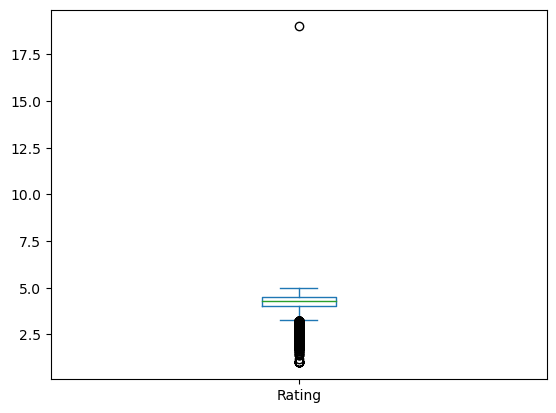

In [21]:
# Checking for Outliers
data['Rating'].plot(kind='box')

Since data has large number of null values so we will not drop it instead we will fill it but to fill these value we first have to check the presence of outliers. if there are outliers present in the data then will fill null values by median() else we will use mean() to fill null values.

It is seen that there are lower bound outliers found so we fill fill null values with median.

In [22]:
data['Rating'].median()

4.3

In [23]:
# Filling the null values with median by using fillna()
data['Rating'].fillna(data['Rating'].median(),inplace=True)
data['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10358, dtype: float64

In [24]:
# Checking if there is any null value found in 'Rating' Column
data['Rating'].isnull().sum()

0

In [25]:
# filtering the data where Rating is more than 5
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [26]:
# Dropping the row where Rating is more than 5 
data=data.drop(data[data['Rating']>5].index)

In [27]:
# Checking null values
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

* Cleaned missing values in Rating.

In [28]:
# Checking null values in the 'Reviews' Column
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [29]:
# conversion of data type from 'Object' to 'Float' by using astype function
data['Reviews'] = data['Reviews'].astype(float)
print(data['Reviews'].dtype)

float64


In [30]:
# Checking Unique Values in the 'Installs' Column
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [31]:
# Changing the "Installs" data by using lambda function
data['Installs']=data['Installs'].apply(lambda x:str(x).replace('+','') if '+' in str(x) else str(x))
data['Installs']=data['Installs'].apply(lambda x:str(x).replace(',','') if ',' in str(x) else str(x))

In [32]:
# Conversion of data type from 'Object' to 'Float' by using astype() function
data['Installs']=data['Installs'].astype(float)

In [33]:
print(data['Installs'].unique())

[1.e+04 5.e+05 5.e+06 5.e+07 1.e+05 5.e+04 1.e+06 1.e+07 5.e+03 1.e+08
 1.e+09 1.e+03 5.e+08 5.e+01 1.e+02 5.e+02 1.e+01 1.e+00 5.e+00 0.e+00]


In [34]:
# checking data type
data['Installs'].dtype

dtype('float64')

In [35]:
# Checking Unique Values in the 'Price' Column
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [36]:
# Changing the "Price" data by using lambda function.
data['Price']=data['Price'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else str(x))

In [37]:
# Conversion of data type from Object to Float by using astype() function
data['Price'] = data['Price'].astype(float)

In [38]:
print(data['Price'].unique())

[  0.     4.99   3.99   6.99   1.49   2.99   7.99   5.99   3.49   1.99
   9.99   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99
  14.99   1.    29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99
  74.99  39.99   3.95   4.49   1.7    8.99   2.     3.88  25.99 399.99
  17.99 400.     3.02   1.76   4.84   4.77   1.61   2.5    1.59   6.49
   1.29   5.    13.99 299.99 379.99  37.99  18.99 389.99  19.9    8.49
   1.75  14.     4.85  46.99 109.99 154.99   3.08   2.59   4.8    1.96
  19.4    3.9    4.59  15.46   3.04   4.29   2.6    3.28   4.6   28.99
   2.95   2.9    1.97 200.    89.99   2.56  30.99   3.61 394.99   1.26
   1.2    1.04]


In [39]:
# checking data type
data['Price'].dtype

dtype('float64')

In [40]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [41]:
# there are sizes counted in mb, kb, in numbers without measurement unit and with "varies with device"
# removing the "m" which is the mb for the size
data['Size']=data['Size'].str.replace('M','')
data['Size']= data['Size'].str.replace("Varies with device","-1")

In [42]:
#Then we replace k and change the unit to Mb
data['Size']=data['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1]=='k' else x) 
# conversion of 1 mb into kb by diving it by 1024 because 1 mb = 1024 kb 

In [43]:
data['Size'] =data['Size'].astype(float)

In [44]:
# Checking unique values
data['Size'].unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   2.7,   5.5,  17. ,  39. ,
        31. ,   4.2,   7. ,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,
        11. ,  24. ,  -1. ,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,
         7.9,  56. ,  57. ,  35. ,  54. ,   0.2,   3.6,   5.7,   8.6,
         2.4,  27. ,   2.5,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,
        32. ,   5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,
         6.7,  30. ,   2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,
         8.2,   9.9,   4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,
         3.5,   4. ,   2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,
         0. ,   6.5,   1.5,   7.5,  51. ,  41. ,  48. ,   8.5,  46. ,
         8.3,   4.3,   4.7,   3.3,  40. ,   7.8,   8.8,   6.6,   5.1,
        61. ,  66. ,   0.1,   8.4,  44. ,   0.7,   1.6,   6.2,  53. ,
         1.4,   3. ,   5.8,   3.8,   9.6,  45. ,  63. ,  49. ,  77. ,
         4.4,   4.8,

In [45]:
# Checking Unique values in the column 
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [46]:
# Checking null values
data['Current Ver'].isnull().sum()

8

* Since there is only 8 null value so we can drop

In [47]:
# Dropping null values in 'Current Ver' Column
data.dropna(subset=['Current Ver'],inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,-1.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [48]:
# Checking if there is any null value found in 'Current Ver' Column
data['Current Ver'].isnull().sum()

0

* Hence no null value found

In [49]:
# Checking null value
data['Android Ver'].isnull().sum()

2

In [50]:
# Checking unique values
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [51]:
# Replacing String
data['Android Ver']= data['Android Ver'].str.replace('and up','+')
data['Android Ver'].unique()

array(['4.0.3 +', '4.2 +', '4.4 +', '2.3 +', '3.0 +', '4.1 +', '4.0 +',
       '2.3.3 +', 'Varies with device', '2.2 +', '5.0 +', '6.0 +',
       '1.6 +', '1.5 +', '2.1 +', '7.0 +', '5.1 +', '4.3 +',
       '4.0.3 - 7.1.1', '2.0 +', '3.2 +', '4.4W +', '7.1 +',
       '7.0 - 7.1.1', '8.0 +', '5.0 - 8.0', '3.1 +', '2.0.1 +',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 +', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [52]:
# Dropping null values
data.dropna(subset=['Android Ver'],inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 +
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 +
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 +
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 +
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 +
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 +
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 +
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 +
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,-1.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [53]:
# Checking if there is any null value found in 'Android Ver' Column.
data['Android Ver'].isnull().sum()

0

In [54]:
# Checking Unique Values in the 'Type' Column
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [55]:
# Checking null value
data['Type'].isna().sum()

1

* Since there is only one null value so we will drop

In [56]:
# Dropping null value
data.dropna(subset=['Type'],inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 +
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 +
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 +
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 +
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 +
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 +
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 +
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 +
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,-1.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [57]:
# Checking if there is any null value found in 'Type' Column
data['Type'].isna().sum()

0

In [58]:
# Converting the data type from Object to datetime.
data['Last Updated']=data['Last Updated'].apply(pd.to_datetime)

In [59]:
print(data['Last Updated'].unique())

['2018-01-07T00:00:00.000000000' '2018-01-15T00:00:00.000000000'
 '2018-08-01T00:00:00.000000000' ... '2014-01-20T00:00:00.000000000'
 '2014-02-16T00:00:00.000000000' '2014-03-23T00:00:00.000000000']


In [60]:
print(data['Last Updated'].dtype)

datetime64[ns]


In [61]:
#  checking null value
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [62]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

## Exploratory Data Analysis

#### Univariate Analysis

In [64]:
# Counting the values of the type column
val4 = data['Type'].value_counts()
val4

Free    9584
Paid     762
Name: Type, dtype: int64

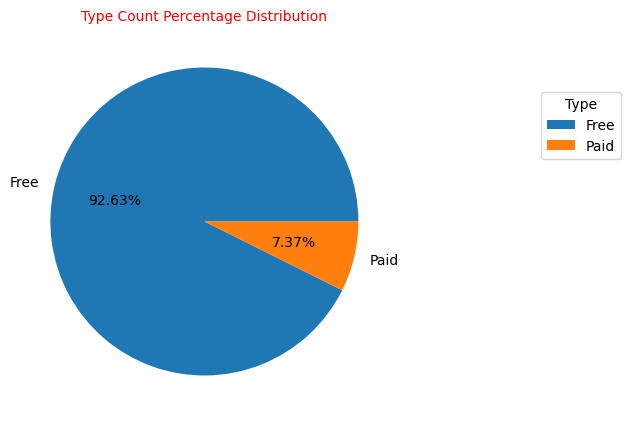

In [65]:
# Getting Percentage Distribution of Type Count
plt.figure(figsize=(10,5))
plt.pie(val4.values,labels=val4.index,autopct='%.2f%%')
plt.title('Type Count Percentage Distribution',fontsize=10,color='red')
plt.legend(val4.index,title='Type',loc='right',bbox_to_anchor=(1,1,0.6,-0.5))
plt.show()

* From this plot we came to know that most of the apps are free.

In [66]:
# Counting Value of the Content Rating Column
data['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

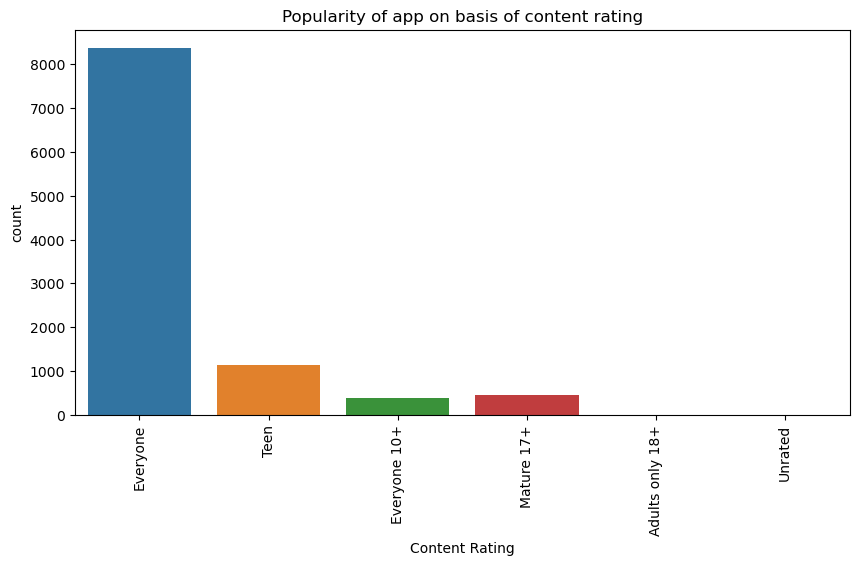

In [67]:
# Finding which Content Rating Type is more popular in Google Play Store
plt.figure(figsize=(10,5))
sns.countplot(x='Content Rating',data=data)
plt.title('Popularity of app on basis of content rating')
plt.xticks(rotation=90)
plt.show()

* From this plotting we can imply that On Google play store more apps are present of every ones use for all age type people.

<Figure size 1000x500 with 0 Axes>

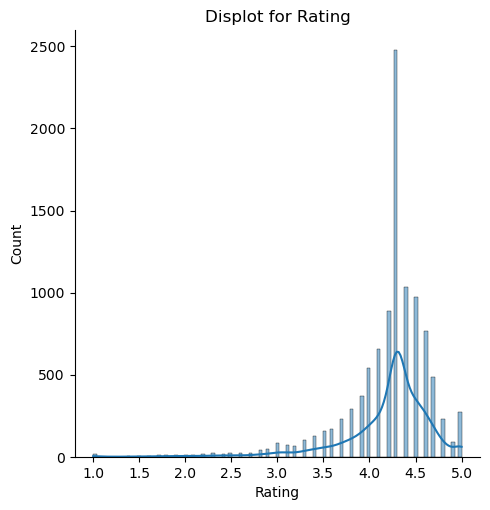

In [68]:
# Getting the Range of Rating for maximum no. of Apps
plt.figure(figsize=(10,5))
sns.displot(data['Rating'],kde='True')
plt.title('Displot for Rating')
plt.show()

* From this plot it came to know that most of the apps are present with rating range between 3.9 to 4.8.

#### Bivariate Analysis

In [69]:
# counting the values of the 'Category' Column
data['Category'].value_counts()

FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

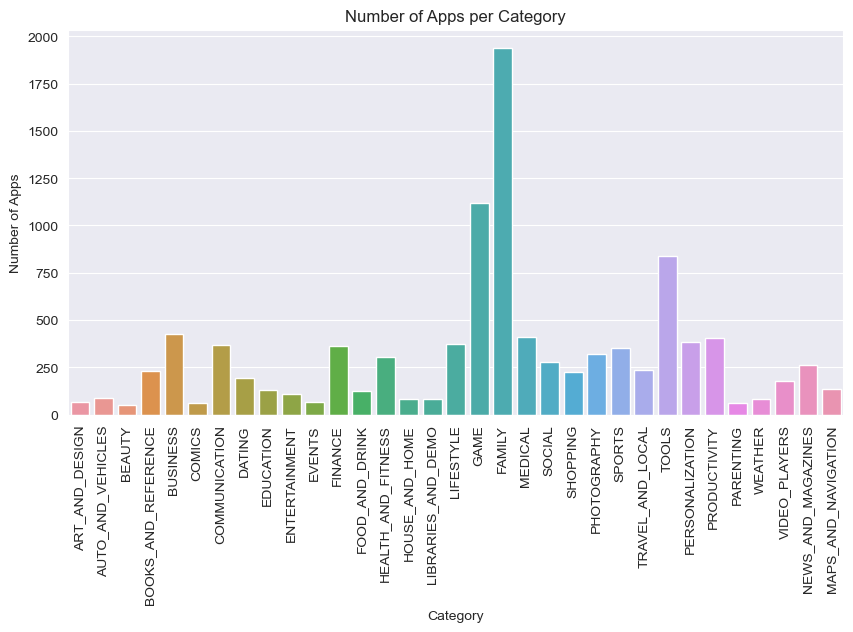

In [70]:
# Getting number of Apps per category
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x="Category",data=data)
plt.title("Number of Apps per Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=90)
plt.show()

* From this plot we came to know that most of the apps in play store are from Game , Family and Tools category.

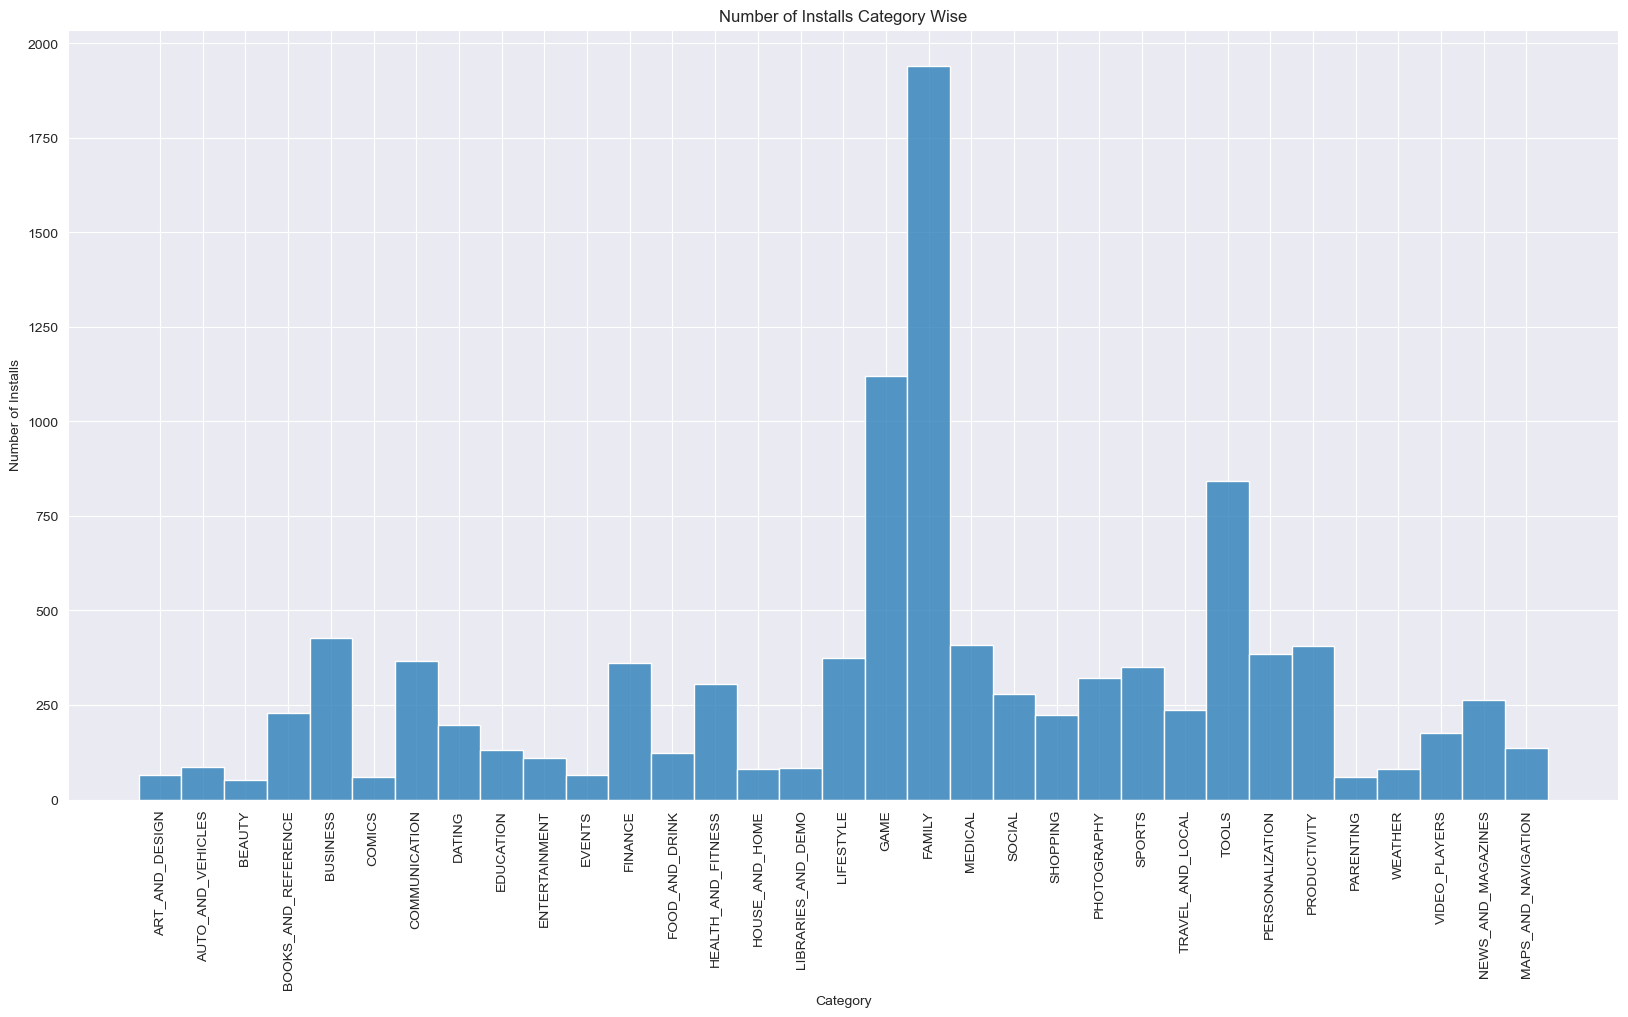

In [71]:
# Getting the no. of installs Category Wise
plt.figure(figsize=(20,10))
sns.histplot(x='Category',data=data)
plt.title('Number of Installs Category Wise')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Installs')
plt.show()

* From this plot it came to know that the most no. of Installs is of "Family' , 'Game' and 'Tools' Category.

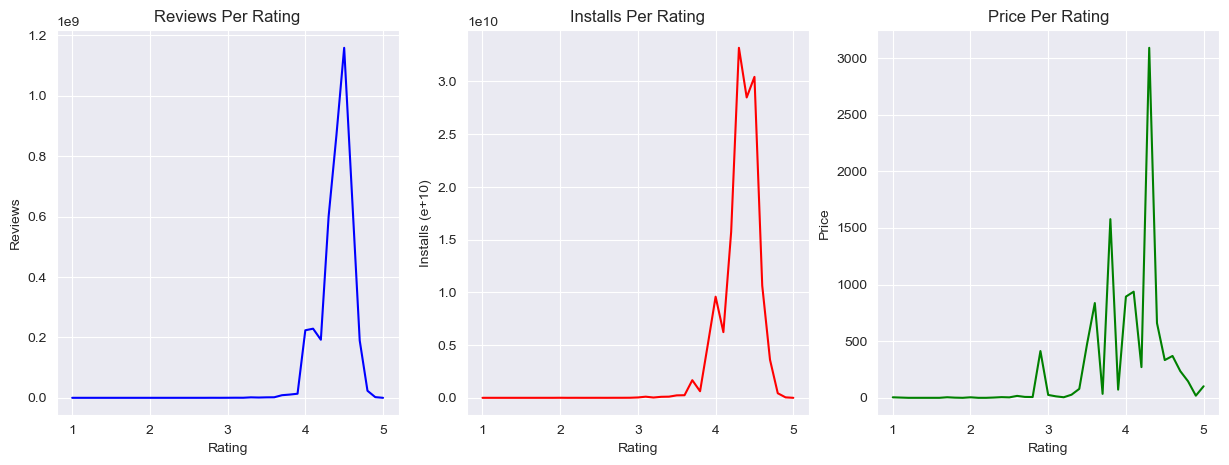

In [72]:
# Plotting the graphs of reviews,  installs and price per rating
rating_data= data.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(rating_data['Rating'], rating_data['Reviews'], 'b')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_data['Rating'], rating_data['Installs'], 'r')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Installs (e+10)')
axes[1].set_title('Installs Per Rating')

axes[2].plot(rating_data['Rating'], rating_data['Price'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Price')
axes[2].set_title('Price Per Rating')

plt.show()

* From the above plottings, we can imply that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

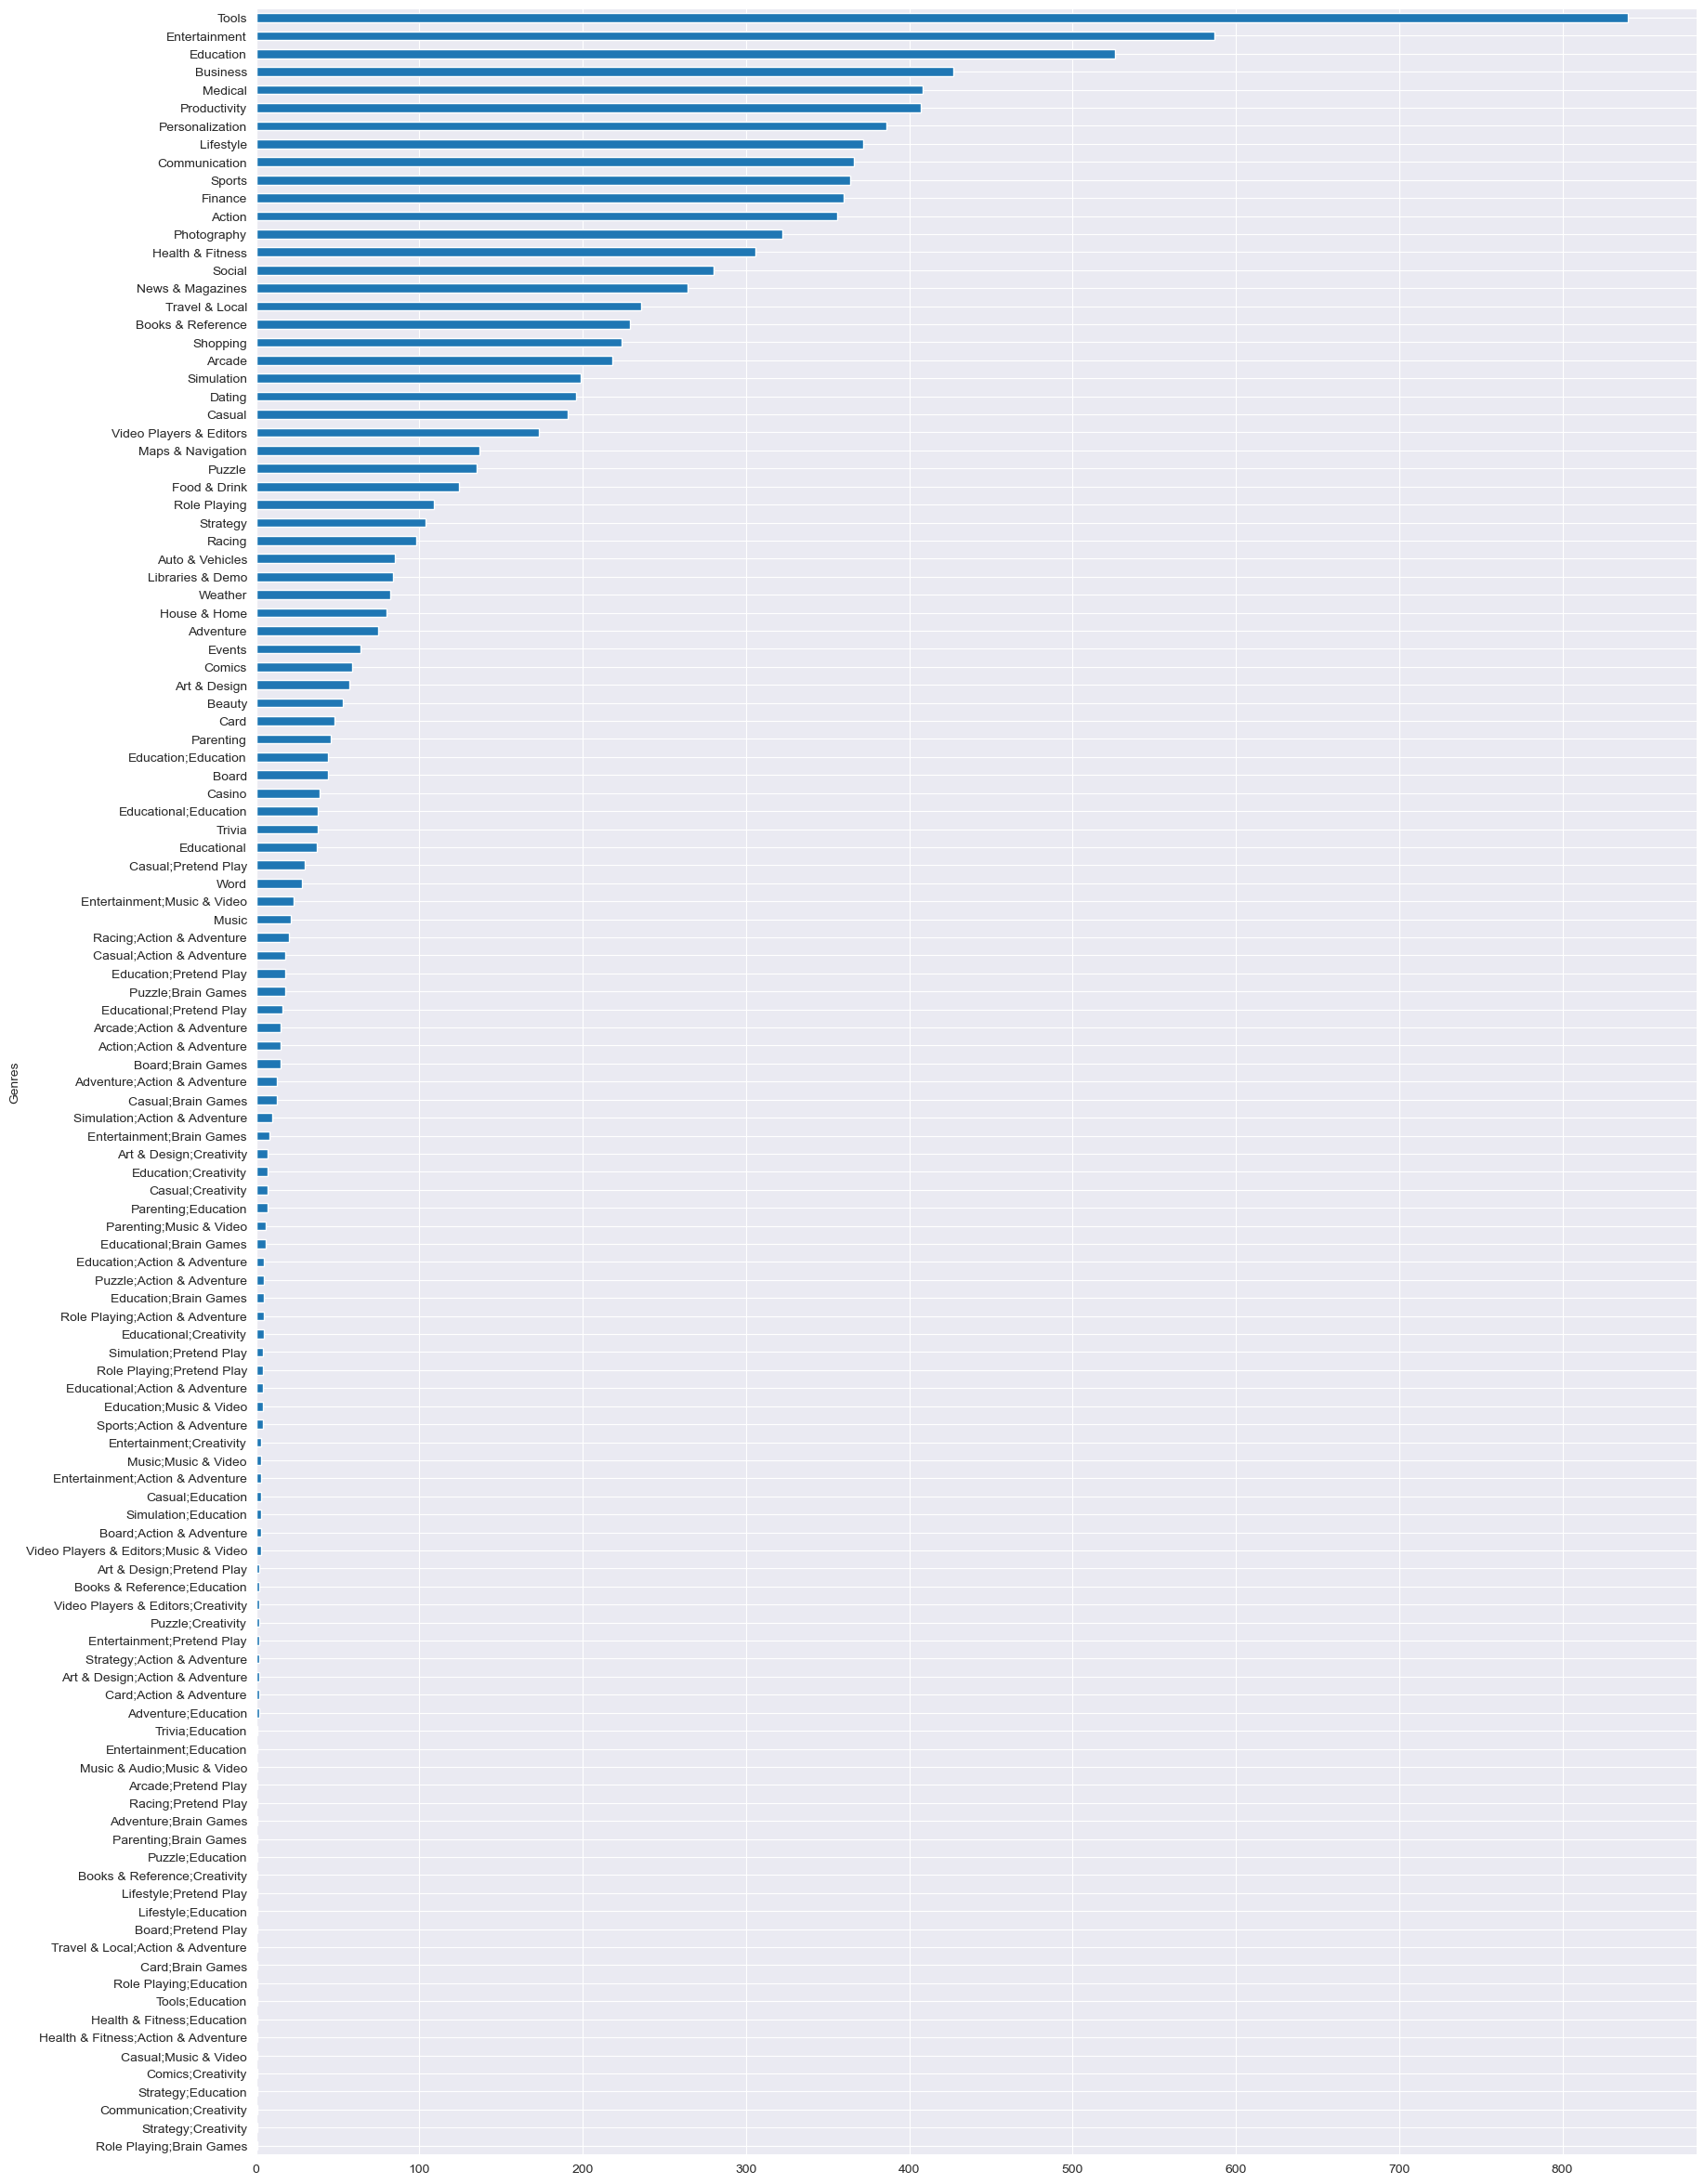

In [73]:
#  Getting the No. of Apps Genre Wise
val5 =data.groupby(['Genres'])['App'].count().sort_values(ascending=True)
plt.figure(figsize=(20,30))
val5.plot(kind='barh')
plt.show()

#### Multivariate Analysis

In [ ]:
# Pairplot for data
sns.pairplot(data,hue='Type')